In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

#plot library
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from helpers import *
from cross_val import *
from preprocessing import *
from plot import *

In [5]:
DEBUG = False

In [6]:
PATH_TRAIN= '../data/train.csv'
PATH_TEST = '../data/test.csv'
y, tX, ids = load_csv_data(PATH_TRAIN, sub_sample=DEBUG)
y_test, tX_test, ids_test = load_csv_data(PATH_TEST, sub_sample=DEBUG)
features_name = np.genfromtxt('../data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

In [7]:
preprocessed_X,preprocessed_X_test, preprocessed_y, masks_test = preprocess_data_new(tX, tX_test,y)

Angles added
Angles added
Angles added
Angles added


In [8]:
#Fixed Parameters 
seed = 1
k_fold = 10

In [101]:
def analysis(x, y):
    
    """
    This Method aims to computes and return the distribution of the test accuracy (from each fold)
    for different model. 
    Input : 
     - x : Data Matrix
     - y : Expected value vector
    """
    
    # Baseline

    params = {'degree': 0, 'cross': False}

    acc_tr_baseline, acc_te_baseline, idx_best = cross_tunning(y, x, k_fold, least_squares,[params], seed)

    print('For baseline')
    print(acc_te_baseline)
  

    # Adding degree 10

    params =  {'degree': 10, 'cross': False}

    acc_tr_deg, acc_te_deg, idx_best = cross_tunning(y, x, k_fold, least_squares, [params], seed)

    print('With degree')
    print(acc_te_deg)

    # Adding cross terms

    params = {'degree': 10, 'cross': True}

    acc_tr_c, acc_te_c, idx_best = cross_tunning(y, x, k_fold, least_squares, [params], seed)

    print('With cross terms')
    print(acc_te_c)

    out = {
        'Baseline': acc_te_baseline[0],
        'Degree Adding': acc_te_deg[0],
        'Cross Term & Degree Adding': acc_te_c[0],
    }

    return out


## Group 0

In [102]:
res_group0 = analysis(preprocessed_X['group_0'], preprocessed_y['group_0'])

For baseline
[[0.815468387617223, 0.822224463043259, 0.8227286477765453, 0.8225269738832308, 0.8133508117374206, 0.8160734092971664, 0.8171826157103963, 0.8168801048704245, 0.8186951699102551, 0.8230311586165171]]
With degree
[[0.8431985479479681, 0.8450136129877988, 0.8507613189472623, 0.845114449934456, 0.8414843198547948, 0.8432993848946254, 0.8434002218412826, 0.8417868306947666, 0.8458203085610567, 0.8499546233740042]]
With cross terms
[[0.8477362105475447, 0.8504588081072905, 0.8531814056670364, 0.8480387213875163, 0.8425935262680246, 0.8454169607744277, 0.845517797721085, 0.841988504588081, 0.849853786427347, 0.8524755470404356]]


## Group 1

In [103]:
res_group1 = analysis(preprocessed_X['group_1'], preprocessed_y['group_1'])

For baseline
[[0.7126211050013093, 0.7206074888714323, 0.7139303482587065, 0.7227022780832679, 0.7140612725844462, 0.7247970672951034, 0.7158942131448023, 0.7153705158418434, 0.7199528672427337, 0.7157632888190626]]
With degree
[[0.8006022518984027, 0.8091123330714847, 0.8139565331238544, 0.8032207384131972, 0.8110761979575806, 0.8084577114427861, 0.8062319979052108, 0.7999476302697041, 0.8123854412149777, 0.8000785545954439]]
With cross terms
[[0.8080649384655669, 0.8139565331238544, 0.8159203980099502, 0.8068866195339094, 0.8143493061010736, 0.8127782141921969, 0.8071484681853889, 0.8032207384131972, 0.8167059439643886, 0.8108143493061011]]


## Group 2

In [104]:
res_group2 = analysis(preprocessed_X['group_2'], preprocessed_y['group_2'])

For baseline
[[0.7443609022556391, 0.7480186953871164, 0.7467994310099573, 0.7402966876651087, 0.7374517374517374, 0.7465962202804308, 0.7362324730745783, 0.7421255842308474, 0.7323714692135744, 0.7392806340174761]]
With degree
[[0.8327575695996748, 0.8382442592968908, 0.8274740906319854, 0.8378378378378378, 0.8402763665921561, 0.8362121520016257, 0.8388538914854704, 0.8305222515748831, 0.8315383052225157, 0.8347896768949401]]
With cross terms
[[0.8388538914854704, 0.8506401137980085, 0.8337736232473074, 0.8427148953464743, 0.8457630562893721, 0.8435277382645804, 0.8484047957732168, 0.839057102214997, 0.8453566348303191, 0.8461694777484251]]


## Group 3

In [105]:
res_group3 = analysis(preprocessed_X['group_3'], preprocessed_y['group_3'])

For baseline
[[0.7319207738369415, 0.7222478120681713, 0.7121142330723169, 0.7204053431598342, 0.72639336711193, 0.7319207738369415, 0.7282358360202672, 0.7148779364348227, 0.7190234914785812, 0.7116536158452326]]
With degree
[[0.841087056655919, 0.8378627360663289, 0.8360202671579917, 0.8281897742975587, 0.8429295255642562, 0.8420082911100876, 0.8341777982496545, 0.8295716259788116, 0.8493781667434362, 0.8314140948871488]]
With cross terms
[[0.8387839705204975, 0.8392445877475817, 0.8369415016121603, 0.8360202671579917, 0.8392445877475817, 0.8479963150621833, 0.8337171810225702, 0.831874712114233, 0.8369415016121603, 0.8304928604329802]]


## Plot

In [106]:
dico={} #We create a dictonary to loop over the model 
for model in ['Baseline', 'Degree Adding', 'Cross Term & Degree Adding']:
    dico[model] = [res_group0[model], res_group1[model],  res_group2[model], res_group3[model]]

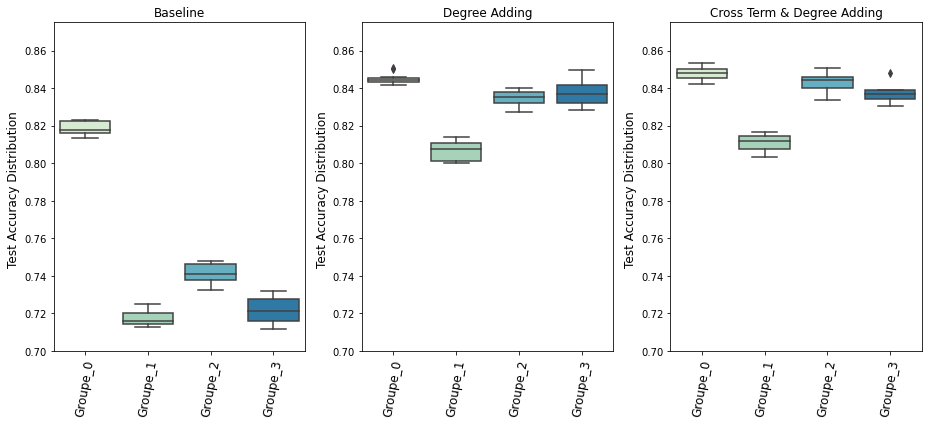

In [125]:
palette = sns.color_palette("GnBu", n_colors=4)
fig, axs = plt.subplots(1, 3, figsize=(13,6))

idx=0   
for key, value in dico.items() :
    ax=axs[idx]
    sns.boxplot(data = dico[key], ax = ax, palette= palette)
    ax.set_xticklabels(['Groupe_0', 'Groupe_1', 'Groupe_2', 'Groupe_3'], rotation = 80, fontsize=12)
    ax.set_title(key)
    ax.set_ylabel("Test Accuracy Distribution ", fontsize=12)
    ax.set(ylim=(0.7, 0.875))
    idx=idx+1
    
fig.tight_layout()   
plt.show()